In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
shoppers_data = pd.read_csv('Online Shoppers Intention.csv', header = 0, sep=',')

In [22]:
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
shoppers_data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [24]:
shoppers_data.shape

(12330, 18)

In [25]:
shoppers_data.dropna(inplace=True)

2. Is there any missing value?

In [26]:
shoppers_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [27]:
shoppers_data.dropna(inplace=True)

3. Data Preprocessing

In [28]:
shoppers_data.select_dtypes('O').columns

Index(['Month', 'VisitorType'], dtype='object')

In [29]:
shoppers_data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

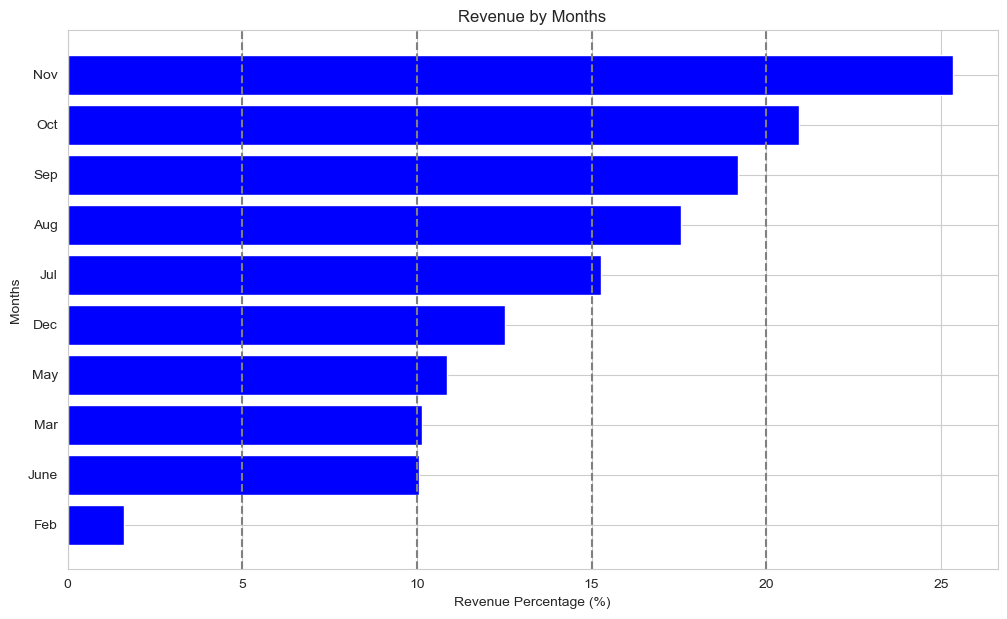

In [30]:
sns.set_style('whitegrid')
revenue_by_months = shoppers_data.groupby('Month')['Revenue'].mean() * 100
revenue_by_months = revenue_by_months.sort_values()
categories = revenue_by_months.index
values = revenue_by_months.values

plt.figure(figsize=(12,7))
plt.barh(categories, values, color = 'b')
plt.xlabel('Revenue Percentage (%)')
plt.ylabel('Months')
plt.title('Revenue by Months')
plt.axvline(5, linestyle = '--', color='gray')
plt.axvline(10, linestyle = '--', color='gray')
plt.axvline(15, linestyle = '--', color='gray')
plt.axvline(20, linestyle = '--', color='gray')
plt.show()

In [31]:
categories

Index(['Feb', 'June', 'Mar', 'May', 'Dec', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], dtype='object', name='Month')

In [32]:
month_label = {'Feb':0, 'June':1, 'Mar':1, 'May':2, 'Dec':2, 'Jul':3, 'Aug':3, 'Sep':3, 'Oct':4, 'Nov':5}


In [33]:
shoppers_data['Month']=shoppers_data['Month'].map(month_label)

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(shoppers_data['VisitorType'])

LabelEncoder()

In [37]:
shoppers_data['VisitorType']=encoder.transform(shoppers_data['VisitorType'])

In [38]:
shoppers_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,0,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,0,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,0,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,0,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,2,4,6,1,1,2,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,5,3,2,1,8,2,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,5,3,2,1,13,2,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,5,2,2,3,11,2,False,False


In [39]:
shoppers_data.select_dtypes('bool').columns

Index(['Weekend', 'Revenue'], dtype='object')

In [41]:
shoppers_data[['Weekend', 'Revenue']]=shoppers_data.select_dtypes('bool').astype('int')

In [42]:
shoppers_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,0,2,2,1,2,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,0,4,1,9,3,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,0,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,0,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,2,4,6,1,1,2,1,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,5,3,2,1,8,2,1,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,5,3,2,1,13,2,1,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,5,2,2,3,11,2,0,0


In [45]:
shoppers_data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,0.107936,-0.006459,-0.025243,-0.005680,-0.033748,-0.025506,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,0.065041,-0.007425,-0.015525,-0.005681,-0.014487,-0.023743,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,0.069225,-0.009435,-0.038257,-0.029442,-0.034510,0.055972,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,0.044827,-0.009596,-0.019346,-0.027244,-0.024731,0.044781,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.202669,0.004193,-0.013326,-0.038318,-0.043235,0.126995,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.172265,0.002885,-0.007549,-0.033263,-0.036538,0.119640,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,-0.061206,0.023965,-0.016009,-0.006731,0.078894,0.135470,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,-0.094440,0.014745,-0.004407,-0.008836,0.078998,0.178928,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063660,0.059818,0.018466,0.045510,0.011233,0.012471,-0.111098,0.011993,0.492494
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063660,1.000000,-0.173616,0.012609,0.003412,-0.016188,0.052273,0.085713,-0.016792,-0.082468


<Axes: >

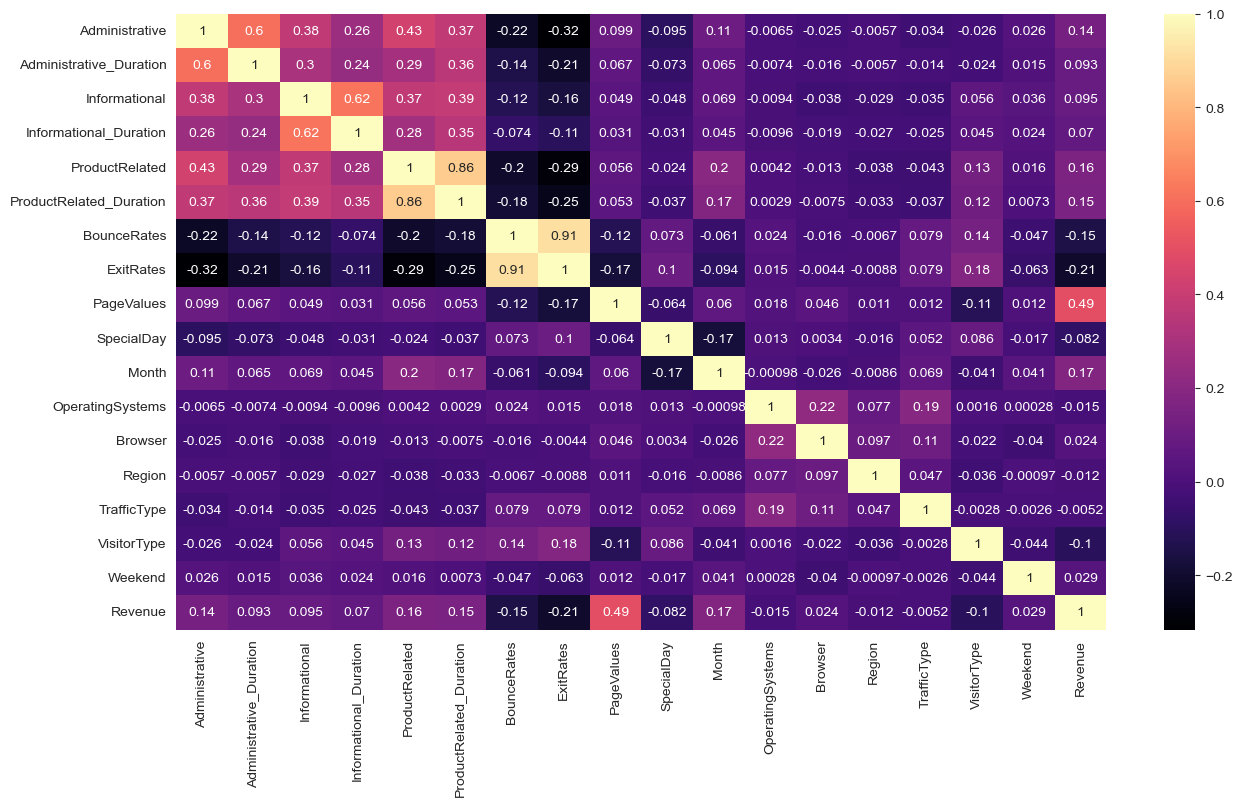

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(shoppers_data.corr(),annot=True,cmap='magma')

In [51]:
X=shoppers_data.drop(['ProductRelated','BounceRates','Revenue'],axis=1)
Y=shoppers_data['Revenue']

5. Is data Imbalanced ?

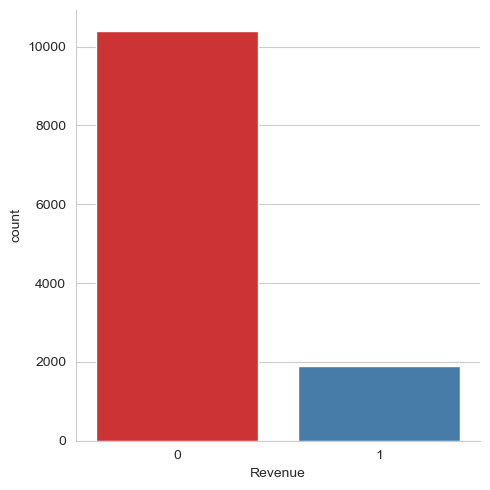

In [60]:
sns.catplot(shoppers_data['Revenue'].value_counts(), kind='bar', palette='Set1')

In [61]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE()
transform_feature, transform_label = smote_sample.fit_resample(X, Y)

6. Split data into Train & Test

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transform_feature, transform_label,test_size=0.2,random_state=0)

Step 7. Data Preprocessing
           * Data Scaling/Normalization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [56]:
xtrain_scaler=scaler.transform(x_train)

In [57]:
xtest_scaler=scaler.transform(x_test)

In [58]:
xtrain_scaler

array([[-0.69470932, -0.46295986, -0.39827433, ..., -0.76362179,
         0.40685693,  1.80029653],
       [-0.69470932, -0.46295986, -0.39827433, ..., -0.01554073,
        -2.4935443 , -0.55546405],
       [-0.69470932, -0.46295986, -0.39827433, ..., -0.51426144,
         0.40685693, -0.55546405],
       ...,
       [-0.69470932, -0.46295986,  2.0228273 , ..., -0.26490108,
         0.40685693, -0.55546405],
       [-0.69470932, -0.46295986, -0.39827433, ..., -0.51426144,
        -2.4935443 ,  1.80029653],
       [-0.39335866,  0.19443165,  0.40875955, ..., -0.76362179,
         0.40685693,  1.80029653]])

Step 8: KNN K-Nearest Neighbours

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [64]:
knn_clf.score(x_test,y_test)

0.8717579250720461

Step 9. GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}

In [66]:
knn_cv=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,scoring='accuracy')

In [67]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [70]:
#Best Model
knn_clf= KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [71]:
knn_clf.score(x_test,y_test)

0.8924111431316042

Step 10. Classification Metrics

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
prediction=knn_clf.predict(x_test)

<Axes: >

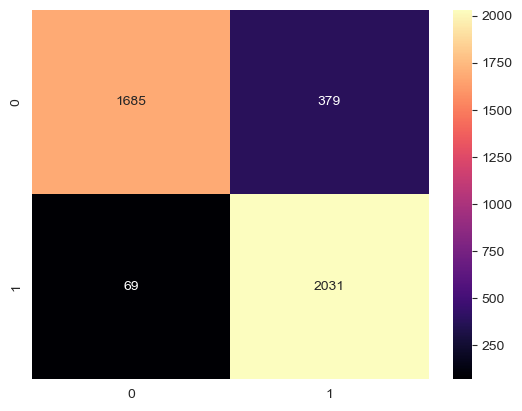

In [73]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt='0.0f',cmap='magma')